In [2]:
import pandas as pd

In [3]:
ADME_public_set = pd.read_csv('ADME_public_set_3521.csv')

In [4]:
#check for each column how many non-null values there are
ADME_public_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Internal ID                                     3521 non-null   object 
 1   Vendor ID                                       3521 non-null   object 
 2   SMILES                                          3521 non-null   object 
 3   CollectionName                                  3521 non-null   object 
 4   LOG HLM_CLint (mL/min/kg)                       3087 non-null   float64
 5   LOG MDR1-MDCK ER (B-A/A-B)                      2642 non-null   float64
 6   LOG SOLUBILITY PH 6.8 (ug/mL)                   2173 non-null   float64
 7   LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)  194 non-null    float64
 8   LOG PLASMA PROTEIN BINDING (RAT) (% unbound)    168 non-null    float64
 9   LOG RLM_CLint (mL/min/kg)                

In [5]:
ADME_public_set

,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg)
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920
3,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,0.675687,1.026662,1.657056,-1.158015,-1.403403,1.027920
4,Mol5,324059015,CC(C)(O)CCn1cc2cc(NC(=O)c3cccc(C(F)(F)F)n3)c(C...,emolecules,0.996380,1.010597,NaN,1.015611,1.092264,1.629093
...,...,...,...,...,...,...,...,...,...,...
3516,Mol3517,43258693,O=C(c1ccc2c(c1)CCCC2)N1CCOCC1c1ccn[nH]1,emolecules,NaN,0.606813,NaN,NaN,NaN,NaN
3517,Mol3518,27448206,O=C(Nc1nc2ccccc2[nH]1)c1ccc(-n2cccc2)cc1,emolecules,NaN,-0.444495,NaN,NaN,NaN,NaN
3518,Mol3519,207150215,NC(=O)c1noc([C@@H](CCCC2CCCCC2)CC(=O)NO)n1,emolecules,0.863799,NaN,NaN,NaN,NaN,NaN
3519,Mol3520,25037224,CCCCCCCCc1ccc(CC[C@](N)(CO)COP(=O)(O)O)cc1,emolecules,0.881385,NaN,NaN,NaN,NaN,NaN


In [9]:
#lets see what we can get here from 2d descriptors
from rdkit import Chem
smiles = ADME_public_set['SMILES'].tolist()
from rdkit.Chem.Descriptors import CalcMolDescriptors
mols = [Chem.AddHs(Chem.MolFromSmiles(x)) for x in smiles]  
mol_weight = [Chem.Descriptors.ExactMolWt(x) for x in mols]
#add the molecular weight to the dataframe
ADME_public_set['MolWt'] = mol_weight
#umol/mL = ug/mL / MolWt 
#mol/L = umol/mL * 1000
ADME_public_set['LOG SOLUBILITY PH 6.8 (mol/L)'] = ADME_public_set['LOG SOLUBILITY PH 6.8 (ug/mL)'] / ADME_public_set['MolWt'] * 1000
#drop the molecular weight column
ADME_public_set = ADME_public_set.drop(columns=['MolWt'])
ADME_public_set


,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg),MolWt,LOG SOLUBILITY PH 6.8 (mol/L)
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169,434.161500,0.207078
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920,418.181647,1.315764
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920,210.128075,NaN
3,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,0.675687,1.026662,1.657056,-1.158015,-1.403403,1.027920,382.108420,4.336612
4,Mol5,324059015,CC(C)(O)CCn1cc2cc(NC(=O)c3cccc(C(F)(F)F)n3)c(C...,emolecules,0.996380,1.010597,NaN,1.015611,1.092264,1.629093,450.187875,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3516,Mol3517,43258693,O=C(c1ccc2c(c1)CCCC2)N1CCOCC1c1ccn[nH]1,emolecules,NaN,0.606813,NaN,NaN,NaN,NaN,311.163377,NaN
3517,Mol3518,27448206,O=C(Nc1nc2ccccc2[nH]1)c1ccc(-n2cccc2)cc1,emolecules,NaN,-0.444495,NaN,NaN,NaN,NaN,302.116761,NaN
3518,Mol3519,207150215,NC(=O)c1noc([C@@H](CCCC2CCCCC2)CC(=O)NO)n1,emolecules,0.863799,NaN,NaN,NaN,NaN,NaN,324.179755,NaN
3519,Mol3520,25037224,CCCCCCCCc1ccc(CC[C@](N)(CO)COP(=O)(O)O)cc1,emolecules,0.881385,NaN,NaN,NaN,NaN,NaN,387.217460,NaN


In [11]:
descriptors = [CalcMolDescriptors(m) for m in mols]

In [12]:
rdkit_descriptors = list(descriptors[0].keys())

In [19]:
#descriptors is now a list of dictionaries, each dictionary contains the descriptors for a molecule as keys. Make each key a column in a dataframe, and add the values
df = pd.DataFrame(descriptors)
df.head()
df['SMILES'] = smiles
#merge with the original dataframe
ADME_public_set_descriptors = pd.merge(ADME_public_set, df, on='SMILES')
#drop MolWt_x
ADME_public_set_descriptors = ADME_public_set_descriptors.drop(columns=['MolWt_x'])
#rename MolWt_y to MolWt
ADME_public_set_descriptors = ADME_public_set_descriptors.rename(columns={'MolWt_y': 'MolWt'})
ADME_public_set_descriptors

,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg),...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169,...,0,0,0,0,0,0,0,0,0,0
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920,...,0,0,0,0,0,0,0,0,0,0
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920,...,0,0,0,0,0,0,0,0,0,0
3,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,0.675687,1.026662,1.657056,-1.158015,-1.403403,1.027920,...,0,0,0,0,0,0,0,0,0,0
4,Mol5,324059015,CC(C)(O)CCn1cc2cc(NC(=O)c3cccc(C(F)(F)F)n3)c(C...,emolecules,0.996380,1.010597,NaN,1.015611,1.092264,1.629093,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,Mol3517,43258693,O=C(c1ccc2c(c1)CCCC2)N1CCOCC1c1ccn[nH]1,emolecules,NaN,0.606813,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3517,Mol3518,27448206,O=C(Nc1nc2ccccc2[nH]1)c1ccc(-n2cccc2)cc1,emolecules,NaN,-0.444495,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3518,Mol3519,207150215,NC(=O)c1noc([C@@H](CCCC2CCCCC2)CC(=O)NO)n1,emolecules,0.863799,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3519,Mol3520,25037224,CCCCCCCCc1ccc(CC[C@](N)(CO)COP(=O)(O)O)cc1,emolecules,0.881385,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [15]:
column_names = ADME_public_set_descriptors.columns.tolist()
properties = column_names[4:10]
# #replace 'LOG SOLUBILITY PH 6.8 (ug/mL)' with 'LOG SOLUBILITY PH 6.8 (mol/L)'
properties[2] = 'LOG SOLUBILITY PH 6.8 (mol/L)'
properties

['LOG HLM_CLint (mL/min/kg)',
 'LOG MDR1-MDCK ER (B-A/A-B)',
 'LOG SOLUBILITY PH 6.8 (mol/L)',
 'LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)',
 'LOG PLASMA PROTEIN BINDING (RAT) (% unbound)',
 'LOG RLM_CLint (mL/min/kg)']

In [16]:
#for each property, find the most import features xgBoost
import warnings

# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
import numpy as np
#X is the descriptors, columns matching rdkit_descriptors, y is the property
#get feature importance for each property
feature_importance_dicts = []
for property in properties:
    ADME_public_set_descriptors_no_null = ADME_public_set_descriptors.dropna(subset=[property])
    X = ADME_public_set_descriptors_no_null[rdkit_descriptors]
    y = ADME_public_set_descriptors_no_null[property]
    # Split data into train and test sets as well as for validation and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

    # Create DMatrix for training and testing
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)

    # make predictions for test data and evaluate
    predictions = model.predict(X_test)
    accuracy = r2_score(y_test, predictions)
    print("r2_score: %.2f%%" % (accuracy * 100.0))
    # Fit model using each importance as a threshold
    thresholds = model.get_booster().get_score(importance_type='weight')

    feature_importance_dict = {k: v for k, v in sorted(thresholds.items(), key=lambda item: item[1], reverse=True)}
    feature_importance_dicts.append(feature_importance_dict)


r2_score: 39.16%
r2_score: 48.17%
r2_score: 43.54%
r2_score: 33.91%
r2_score: 27.74%
r2_score: 40.26%


In [21]:
import xgboost as xgb
from sklearn.metrics import r2_score
treshs_lol,ns_lol,r2s_lol = [],[],[]
for feature_importance_dict in feature_importance_dicts:
    treshs,ns,r2s = [],[],[]
    tresh_vals = list(set(feature_importance_dict.values()))
    #start with highest threshold
    tresh_vals.sort(reverse=True)
    for thresh in tresh_vals:
        # Get features from feature_importance_dict with a value above the threshold
        new_features = [i for i in feature_importance_dict.keys() if feature_importance_dict[i] > thresh]

        # Check if there are selected features
        if len(new_features) == 0:
            print("No features selected for threshold %.3f" % thresh)
            continue

        # Now get DataFrames X with only the new features
        X_train_new = X_train[new_features]
        X_test_new = X_test[new_features]

        selection_model = xgb.XGBRegressor()
        selection_model.fit(X_train_new, y_train)
        
        # Evaluate the model
        predictions = selection_model.predict(X_test_new)
        accuracy = r2_score(y_test, predictions)
        
        treshs.append(thresh)
        ns.append(X_train_new.shape[1])
        r2s.append(accuracy)
    treshs_lol.append(treshs)
    ns_lol.append(ns)
    r2s_lol.append(r2s)

No features selected for threshold 327.000
No features selected for threshold 337.000
No features selected for threshold 367.000
No features selected for threshold 131.000
No features selected for threshold 96.000
No features selected for threshold 386.000


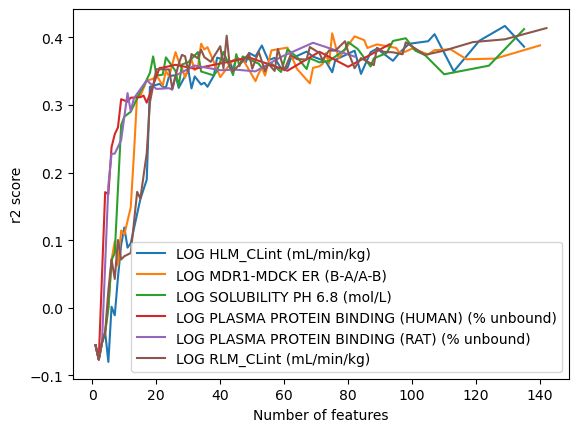

LOG HLM_CLint (mL/min/kg) 129 0.41703367231484323
LOG MDR1-MDCK ER (B-A/A-B) 75 0.40607431452712583
LOG SOLUBILITY PH 6.8 (mol/L) 135 0.41236024900176493
LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound) 93 0.390020586114345
LOG PLASMA PROTEIN BINDING (RAT) (% unbound) 69 0.3921100722327947
LOG RLM_CLint (mL/min/kg) 142 0.4138521212492935


In [22]:
#for each property, plot the r2 score as a function of the number of features
import matplotlib.pyplot as plt
import numpy as np
for i in range(len(properties)):
    plt.plot(ns_lol[i],r2s_lol[i],label=properties[i])
plt.xlabel('Number of features')
plt.ylabel('r2 score')
plt.legend()
plt.show()
#and get the number of features that gives the best r2 score
for i in range(len(properties)):
    print(properties[i],ns_lol[i][np.argmax(r2s_lol[i])],r2s_lol[i][np.argmax(r2s_lol[i])])

In [23]:
top_2d_features_lol = []
for feature_importance_dict,treshs,r2s in zip(feature_importance_dicts,treshs_lol,r2s_lol):
    top_2d_features = [i for i in feature_importance_dict.keys() if feature_importance_dict[i] > treshs[r2s.index(max(r2s))]]
    top_2d_features_lol.append(top_2d_features)


In [24]:
import tqdm
import xgboost as xgb
from sklearn.model_selection import KFold
import numpy as np
outputs = []
kf = KFold(n_splits=5)
for property,top_2d_features in zip(properties,top_2d_features_lol):
    print(property)
    ADME_public_set_descriptors_no_null = ADME_public_set_descriptors.dropna(subset=[property])
    print(len(ADME_public_set_descriptors),len(ADME_public_set_descriptors_no_null))
    X = ADME_public_set_descriptors_no_null[top_2d_features]
    y = ADME_public_set_descriptors_no_null[property]
    # assuming X is your input data as a pandas DataFrame
    if property == 'LOG HLM_CLint (mL/min/kg)':
        continue
    if property == 'LOG RLM_CLint (mL/min/kg)':
        continue
    # print(X.isinf().sum())
    # print(X.isnan().sum())
    output = ([], [])
    for train, test in tqdm.tqdm(kf.split(X)):
        
        train_x = np.array(X)[train]
        train_y = np.array(y)[train]

        test_x = np.array(X)[test]
        test_y = np.array(y)[test]
        
        selection_model = xgb.XGBRegressor()
        selection_model.fit(train_x, train_y)
        
        # Evaluate the model
        predictions = selection_model.predict(test_x)

        output[0].append(test_y)
        output[1].append(predictions)

    outputs.append(output)

LOG HLM_CLint (mL/min/kg)
3521 3087
LOG MDR1-MDCK ER (B-A/A-B)
3521 2642


0it [00:00, ?it/s]

5it [00:01,  3.99it/s]


LOG SOLUBILITY PH 6.8 (mol/L)
3521 2173


5it [00:01,  3.79it/s]


LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)
3521 194


5it [00:00, 29.69it/s]


LOG PLASMA PROTEIN BINDING (RAT) (% unbound)
3521 168


5it [00:00, 18.67it/s]

LOG RLM_CLint (mL/min/kg)
3521 3054


In [25]:
from functools import reduce
reals, predictions = [], []
for output in outputs:
    real, prediction = (reduce(lambda a,b : list(a)+list(b) , output[0]), reduce(lambda a,b : list(a)+list(b), output[1]))
    reals.append(real)
    predictions.append(prediction)

In [26]:
#now for each property, plot the real vs predicted values
from sklearn.model_selection import KFold
import numpy as np
import tqdm
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from functools import reduce
from scipy.stats import linregress
import matplotlib.pyplot as plt
def getStatValues(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    this_rmse = mean_squared_error(np.array(x), np.array(y), squared=False)
    this_mue = mean_absolute_error(np.array(x), np.array(y))
    return slope, intercept, r_value**2, this_rmse, this_mue
def density_plot(real,prediction,print_stats=True):
    if print_stats:
        slope_mdfp_d, intercept_mdfp_d, r2, this_rmse, this_mae = getStatValues(prediction, real)
        print('RMSE: ', this_rmse)
        print('MAE: ', this_mae)
        print('R2: ', r2)
    fsize = 20
    fig = plt.figure(1, figsize=(10, 6.15))
    ax = plt.subplot(111)
    lower = min(prediction + real) - 2
    upper = max(prediction + real) + 2
    x = np.linspace(lower, upper,100)
    y = slope_mdfp_d*x+intercept_mdfp_d
    plt.plot(x, y, '-r')
    plt.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
    plt.plot([min(prediction + real), max(prediction + real)], [min(prediction + real)-1, max(prediction + real) - 1], 'k--')
    plt.plot([min(prediction + real), max(prediction + real)], [min(prediction + real)+1, max(prediction + real)+1], 'k--')

    import statsmodels.api as sm
    dens_u = sm.nonparametric.KDEMultivariate(data=[prediction, real],var_type='cc', bw='normal_reference')
    z = dens_u.pdf([prediction, real])

    sc = plt.scatter(prediction, real, lw=0, c=z, s=10, alpha = 0.9)

    cbar = plt.colorbar(sc)
    cbar.ax.tick_params(labelsize=fsize)

    plt.ylabel(r'Exp. $\log (VP)$', fontsize=fsize)
    plt.xlabel(r'Predicted $\log (VP)$', fontsize=fsize)
    plt.setp(ax.get_xticklabels(), fontsize=fsize)
    plt.setp(ax.get_yticklabels(), fontsize=fsize)
    plt.grid(1,"both")
    plt.axis([lower, upper, lower, upper])
    plt.tight_layout()
    plt.show()

In [104]:

outputs = []
kf = KFold(n_splits=5)
params = {
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
for property,top_2d_features in zip(properties,top_2d_features_lol):
    print(property)
    ADME_public_set_descriptors_no_null = ADME_public_set_descriptors.dropna(subset=[property])
    print(len(ADME_public_set_descriptors),len(ADME_public_set_descriptors_no_null))
    X = ADME_public_set_descriptors_no_null[top_2d_features]
    y = ADME_public_set_descriptors_no_null[property]
    # assuming X is your input data as a pandas DataFrame
    if property == 'LOG HLM_CLint (mL/min/kg)':
        continue
    if property == 'LOG RLM_CLint (mL/min/kg)':
        continue
    # print(X.isinf().sum())
    # print(X.isnan().sum())
    output = ([], [])
    for train, test in tqdm.tqdm(kf.split(X)):
        
        train_x = np.array(X)[train]
        train_y = np.array(y)[train]

        test_x = np.array(X)[test]
        test_y = np.array(y)[test]
        
        dtrain = xgb.DMatrix(train_x, label=train_y)
        dtest = xgb.DMatrix(test_x, label=test_y)
        model = xgb.train(
        params,
        dtrain,
        num_boost_round=999,
        evals=[(dtest, "Test")],
        early_stopping_rounds=10,
        verbose_eval=False

        )
        # Evaluate the model
        predictions = model.predict(dtest)

        output[0].append(test_y)
        output[1].append(predictions)

    outputs.append(output)


LOG HLM_CLint (mL/min/kg)
3521 3087
LOG MDR1-MDCK ER (B-A/A-B)
3521 2642


5it [00:00,  8.86it/s]


LOG SOLUBILITY PH 6.8 (ug/mL)
3521 2173


5it [00:00, 18.94it/s]


LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)
3521 194


5it [00:00, 46.32it/s]


LOG PLASMA PROTEIN BINDING (RAT) (% unbound)
3521 168


5it [00:00, 47.89it/s]

LOG RLM_CLint (mL/min/kg)
3521 3054


LOG MDR1-MDCK ER (B-A/A-B)
RMSE:  0.5037928985976025
MAE:  0.37904156376519377
R2:  0.4682578113796987


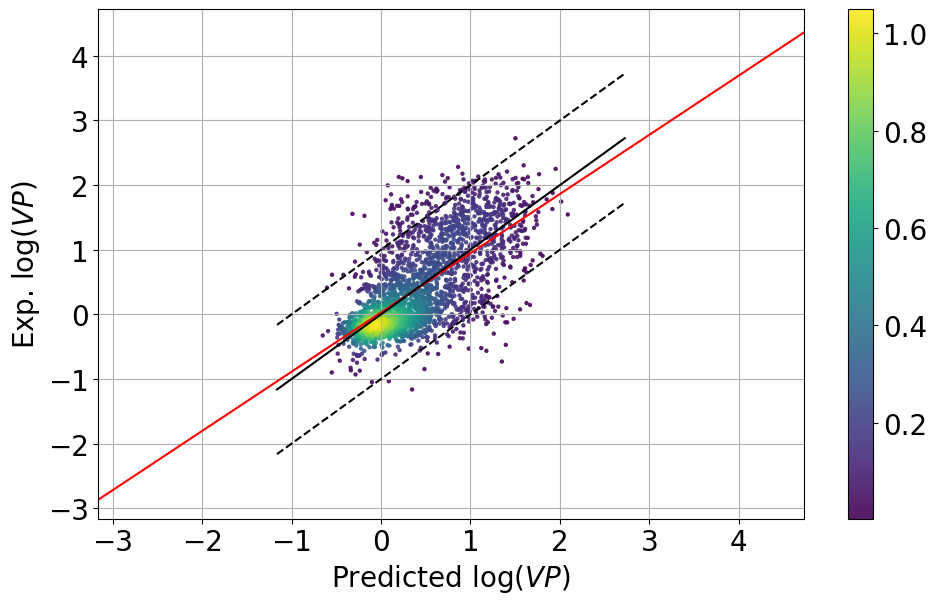





LOG SOLUBILITY PH 6.8 (mol/L)
RMSE:  2.0229317302990553
MAE:  1.3670102177544243
R2:  0.3300744481687361


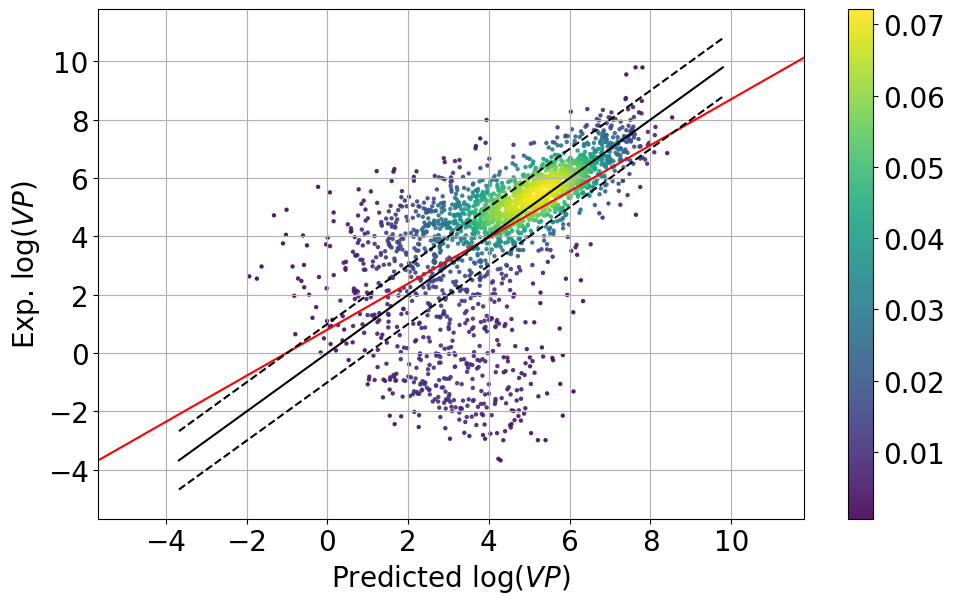





LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound)
RMSE:  0.6914889091352217
MAE:  0.5206420468887237
R2:  0.3588129429872163


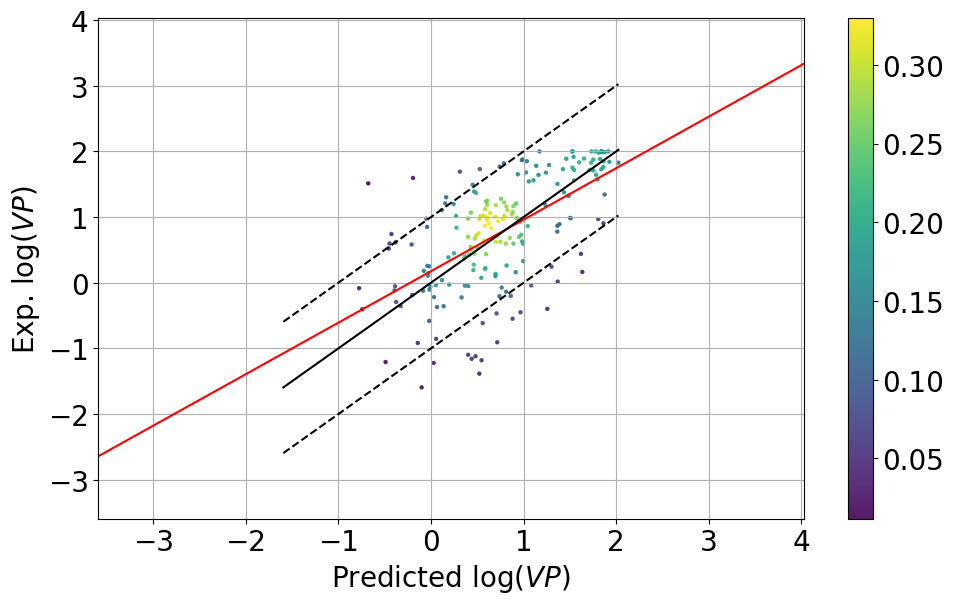





LOG PLASMA PROTEIN BINDING (RAT) (% unbound)
RMSE:  0.6787220513037295
MAE:  0.5086785508136706
R2:  0.3103036693939499


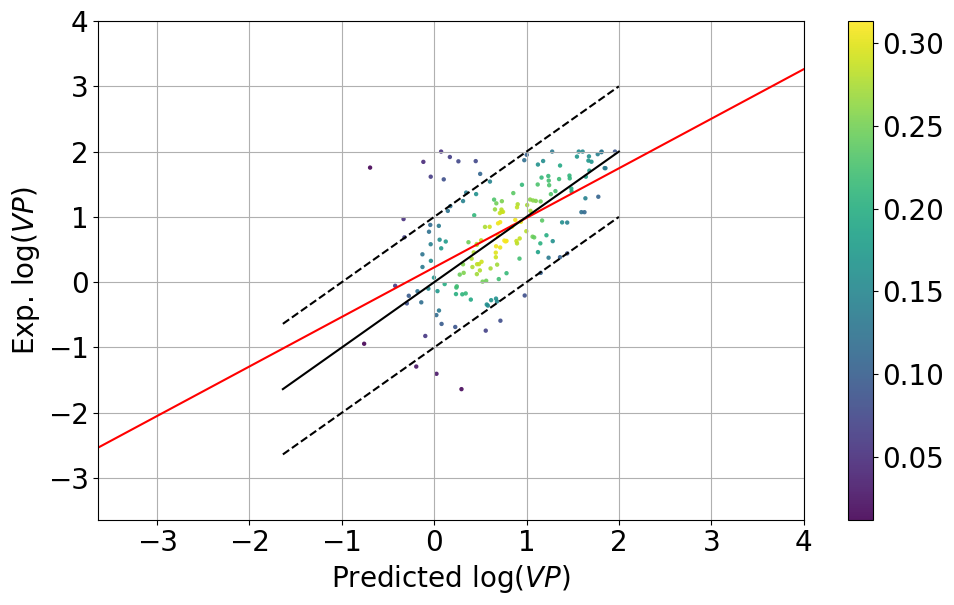

In [27]:
from functools import reduce
reals, predictions = [], []
for output in outputs:
    real, prediction = (reduce(lambda a,b : list(a)+list(b) , output[0]), reduce(lambda a,b : list(a)+list(b), output[1]))
    reals.append(real)
    predictions.append(prediction)
working_properties = [p for p in properties if p != 'LOG HLM_CLint (mL/min/kg)' and p != 'LOG RLM_CLint (mL/min/kg)']
for real,prediction,property in zip(reals,predictions,working_properties):

    print(property)

    density_plot(real,prediction)
    print('\n\n\n')

In [108]:
#calculate FCFP4 fingerprints for all molecules with solubility data
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdMolDescriptors

mols
FCFP4S = [AllChem.GetMorganFingerprint(m, 2, useFeatures=True) for m in mols]

In [113]:
FCFP4S[0]
DataStructs.ConvertToNumpyArray(FCFP4S[0])

ArgumentError: Python argument types in
    rdkit.DataStructs.cDataStructs.ConvertToNumpyArray(UIntSparseIntVect)
did not match C++ signature:
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<unsigned int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<long> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::SparseIntVect<int> bv, boost::python::api::object destArray)
    ConvertToNumpyArray(RDKit::DiscreteValueVect bv, boost::python::api::object destArray)
    ConvertToNumpyArray(ExplicitBitVect bv, boost::python::api::object destArray)

In [109]:
ADME_public_set_fingerprints = ADME_public_set.copy()   
ADME_public_set_fingerprints['FCFP4'] = FCFP4S
ADME_public_set_fingerprints

,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg),FCFP4
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
3,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,0.675687,1.026662,1.657056,-1.158015,-1.403403,1.027920,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
4,Mol5,324059015,CC(C)(O)CCn1cc2cc(NC(=O)c3cccc(C(F)(F)F)n3)c(C...,emolecules,0.996380,1.010597,NaN,1.015611,1.092264,1.629093,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
...,...,...,...,...,...,...,...,...,...,...,...
3516,Mol3517,43258693,O=C(c1ccc2c(c1)CCCC2)N1CCOCC1c1ccn[nH]1,emolecules,NaN,0.606813,NaN,NaN,NaN,NaN,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
3517,Mol3518,27448206,O=C(Nc1nc2ccccc2[nH]1)c1ccc(-n2cccc2)cc1,emolecules,NaN,-0.444495,NaN,NaN,NaN,NaN,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
3518,Mol3519,207150215,NC(=O)c1noc([C@@H](CCCC2CCCCC2)CC(=O)NO)n1,emolecules,0.863799,NaN,NaN,NaN,NaN,NaN,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
3519,Mol3520,25037224,CCCCCCCCc1ccc(CC[C@](N)(CO)COP(=O)(O)O)cc1,emolecules,0.881385,NaN,NaN,NaN,NaN,NaN,<rdkit.DataStructs.cDataStructs.UIntSparseIntV...
